# AAAHHAHAHAHHHAHAHAA.

Hahaha.

Okay yeah, so I shouldn't be using a random forest model, I should be using a regression flavored, normal decision tree.  HERP.  Alright.  Well, I did some interesting things anyway, no regrets.  

-Won't have to worry about scaling.
-I can test w/ and w/o 'sex' column.
-Plenty of parameters to tune, and beware of overfitting.
-Use fixed version of X and y.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#Regression tree can't handle categorical variables
df = pd.get_dummies(df, columns = ['sex'])

y = df['rings']
X = df.drop('rings', axis=1)

Lessons from Documentation

max_depth controls fit.  Higher depth can lead to overfitting.
can try min_samples_leaf too.

In [16]:
#basics

regressor = DecisionTreeRegressor(random_state=0)

#So I've been farting up this line the whole time that's comforting.
#I want to use this train/test set the rest of the notebook.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

reg1 = regressor.fit(X_train, y_train)
score = reg1.score(X_test, y_test)
print(score)

0.092987673095


In [17]:
def regTree(X_train, X_test, y_train, y_test, depth, min_samples_split=2, min_samples_leaf=1):

    model = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=0)
    score = model.fit(X_train, y_train).score(X_test, y_test)
    
    return score

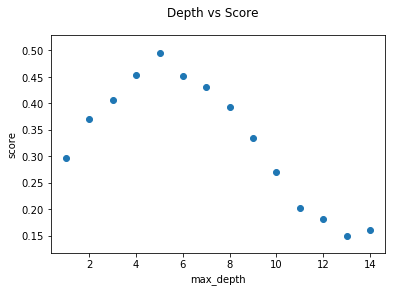

In [18]:
#testing max_depth
scores=[]
depths= list(range(1,15,1))

for depth in depths:
    score = regTree(X_train, X_test, y_train, y_test, depth)
    scores.append(score)

plt.scatter(x=depths, y=scores)
plt.suptitle('Depth vs Score')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

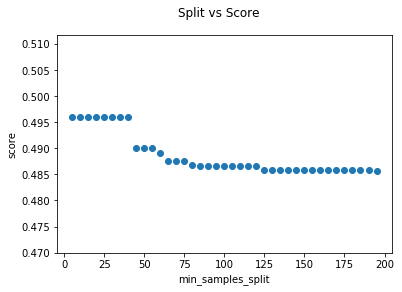

In [19]:
#Well, best depth looks like 5, so we'll stick with that for further testing.
#Testing min_samples_split 

split_scores=[]
splits= list(range(5,200,5))

for split in splits:
    score = regTree(X_train, X_test, y_train, y_test, 5, min_samples_split=split)
    split_scores.append(score)

plt.scatter(x=splits, y=split_scores)
plt.suptitle('Split vs Score')
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

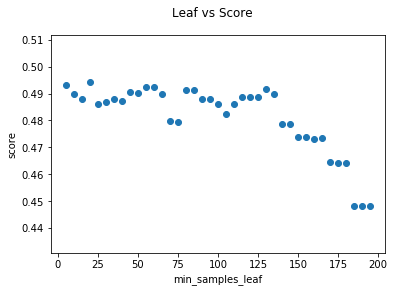

In [20]:
#Interesting.  Let's keep Split at default for now.
#Testing min_samples_leaf

#Well, best depth looks like 5, so we'll stick with that for further testing.
#Testing min_samples_split 

leaf_scores=[]
leaves = list(range(5,200,5))

for leaf in leaves:
    score = regTree(X_train, X_test, y_train, y_test, 5, min_samples_leaf=leaf)
    leaf_scores.append(score)

plt.scatter(x=leaves, y=leaf_scores)
plt.suptitle('Leaf vs Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()

It looks like min_samples_leaf should stay at the default.

EDIT 2/14/18:  Rexamining results.  max_depth = 5, min_samples_split = 35, min_samples_leaf = 20


0.494136289806


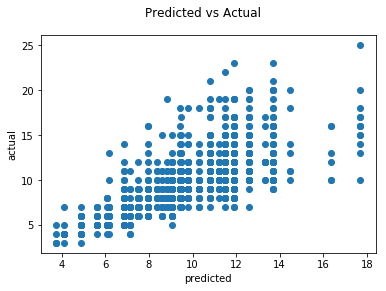

In [21]:
#Working with refined model.

regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [22]:
print(model.feature_importances_)
X.columns

[  0.00000000e+00   0.00000000e+00   4.52163224e-03   2.70858862e-04
   1.42636727e-01   1.05486126e-03   8.07321754e-01   3.03539820e-03
   4.11587685e-02   0.00000000e+00]


Index(['length', 'diameter', 'height', 'whole weight', 'shucked weight',
       'viscera weight', 'shell weight', 'sex_F', 'sex_I', 'sex_M'],
      dtype='object')

In [23]:
np.corrcoef(model.predict(X_test),y_test)

array([[ 1.        ,  0.70383579],
       [ 0.70383579,  1.        ]])

In [24]:
#Scaling the data first

SDF = StandardScaler().fit_transform(df)
SDF = pd.DataFrame(SDF, columns=df.columns)

y = SDF['rings']
X = SDF.drop('rings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

0.495468543605
[[ 1.          0.70473043]
 [ 0.70473043  1.        ]]


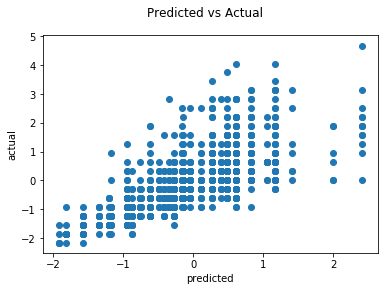

In [25]:
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=35, min_samples_leaf=20, random_state=0)

model = regressor.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
print(np.corrcoef(model.predict(X_test),y_test))

plt.scatter(model.predict(X_test), y_test)
plt.suptitle('Predicted vs Actual')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [26]:
foo = np.corrcoef(model.predict(X_test),y_test)
foo[0,1]

0.70473043448241213

Scaling had ZERO EFFECT.